In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np


In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt



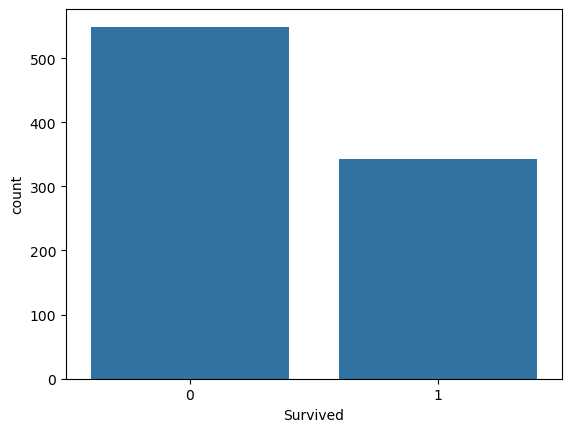

In [9]:
sns.countplot(x= 'Survived', data= data)
plt.show()

In [10]:
data['Age']= data['Age'].fillna(data['Age'].median())

In [11]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
data['Fare']= data['Fare'].fillna(data['Fare'].median())

In [14]:
data.drop('Cabin', axis=1, inplace=True)

In [15]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
data['Sex'] = data['Sex'].map({'male': 0, 'female':1})

In [18]:
data_embarked = pd.get_dummies(data['Embarked'], prefix='Embarked').astype(int)
data = pd.concat([data, data_embarked], axis=1)
data.drop('Embarked', axis=1, inplace=True)

In [19]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,1


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])



In [22]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,1,0,PC 17599,0.786845,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,0,0,1
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,0,0,1


In [24]:
data['features'] = data[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked_C','Embarked_Q','Embarked_S']].values.tolist()
X_train = data['features']
y_train = data['Survived']


In [25]:
X_test = data['features']


In [26]:
print(data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'features'],
      dtype='object')


In [27]:
print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)
print(X_train[:5])
print(y_train[:5])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(891,)
(891,)
0    [3.0, 0.0, -0.5657364610748746, 1.0, 0.0, -0.5...
1    [1.0, 1.0, 0.6638610320657843, 1.0, 0.0, 0.786...
2    [3.0, 1.0, -0.2583370877897099, 0.0, 0.0, -0.4...
3    [1.0, 1.0, 0.4333115021019107, 1.0, 0.0, 0.420...
4    [3.0, 0.0, 0.4333115021019107, 0.0, 0.0, -0.48...
Name: features, dtype: object
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [28]:
X_train = np.array(X_train.tolist())
y_train = np.array(y_train)

In [29]:
print(X_train.shape)
print(y_train.shape)

(891, 9)
(891,)


In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [31]:
X_test = np.array(X_test.tolist())

In [32]:
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_train_pred = model.predict(X_train)
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Precision:", accuracy_score(y_train, y_train_pred))
print("Recall:", accuracy_score(y_train, y_train_pred))
print("F1-Score:", accuracy_score(y_train, y_train_pred))

Accuracy: 0.8013468013468014
Precision: 0.8013468013468014
Recall: 0.8013468013468014
F1-Score: 0.8013468013468014


In [35]:
output = pd.DataFrame({'PassengerId': data['PassengerId'], 'Survived': y_pred})
output.to_csv('predictions.csv', index=False)